Our scenario continues:

As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

#### Create a notebook named model.ipynb.
#### Run all your previous scripts that acquired, prepared, split, and scaled your data.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

import env
import wrangle
import split_scale
import features

df = wrangle.wrangle_telco()
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1685 non-null object
monthly_charges    1685 non-null float64
tenure             1685 non-null int64
total_charges      1685 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 65.8+ KB


In [11]:
train, test = split_scale.split_my_data(df)
train, test

(     customer_id  monthly_charges  tenure  total_charges
 119   0707-HOVVN            75.50      70        5212.65
 1424  8380-MQINP            20.30      55        1079.05
 385   2307-FYNNL           109.05      65        7108.20
 1140  6797-LNAQX            98.30      70        6859.50
 1504  8879-XUAHX           116.25      71        8564.75
 435   2632-IVXVF           111.75      68        7511.30
 571   3474-BAFSJ            57.50      57        3265.95
 656   3933-DQPWX            39.70      50        1932.75
 756   4683-WYDOU           107.60      62        6912.70
 574   3500-NSDOA            70.80      68        4859.95
 1216  7197-VOJMM            69.20      67        4671.65
 1057  6370-ZVHDV            25.30      61        1554.90
 1134  6749-UTDVX           103.65      72        7634.80
 1253  7480-SPLEF            26.00      69        1796.55
 1035  6253-GNHWH            71.10      71        5224.95
 775   4785-FCIFB            24.40      61        1417.90
 1403  8232-UT

In [ ]:
# x = df.drop(columns=['customer_id', 'total_charges'])
# y = pd.DataFrame(df['total_charges'])

In [17]:
scaler, train_scaled, test_scaled = split_scale.standard_scaler(train.drop(columns=['customer_id', 'total_charges']), test.drop(columns=['customer_id', 'total_charges']))
scaler, train_scaled, test_scaled

(StandardScaler(copy=True, with_mean=True, with_std=True),
       monthly_charges    tenure
 119          0.419607  0.729412
 1424        -1.169158 -0.130571
 385          1.385242  0.442751
 1140         1.075836  0.729412
 1504         1.592472  0.786745
 435          1.462954  0.614748
 571         -0.098468 -0.015907
 656         -0.610787 -0.417232
 756          1.343508  0.270754
 574          0.284332  0.614748
 1216         0.238281  0.557416
 1057        -1.025248  0.213422
 1134         1.229820  0.844077
 1253        -1.005100  0.672080
 1035         0.292967  0.786745
 775         -1.051152  0.213422
 1403        -1.179231  0.672080
 515         -1.173475 -0.417232
 1106        -1.156206  0.041426
 1694        -0.055295  0.328087
 1090         0.435437  0.786745
 1517        -1.173475 -0.417232
 132         -1.159084 -0.015907
 1040        -1.018052  0.844077
 72          -1.176353 -0.531897
 551         -1.141815 -1.563877
 1028         0.085736 -0.302568
 1432         0.5

In [22]:
x_train = train_scaled
y_train = train[['total_charges']]
x_test = test_scaled
y_test = test[['total_charges']]

### Select your features using your features script.

In [23]:
features.optimal_n_features(x_train, y_train)

(2, 0.9635878360528035)

In [24]:
features.top_features(x_train, y_train, 2)

Index(['monthly_charges', 'tenure'], dtype='object')

### Fit 2 different linear models to your data.

In [35]:
predictions=pd.DataFrame({'actual':y_train.total_charges}).reset_index(drop=True)
# model 1
lm1 = LinearRegression()
lm1.fit(x_train[['monthly_charges', 'tenure']], y_train)
lm1_predictions = lm1.predict(x_train[['monthly_charges', 'tenure']])
predictions['lm1'] = lm1_predictions

In [37]:
# model 2
lm2 = LinearRegression()
lm2.fit(x_train[['tenure']], y_train)
lm2_predictions = lm2.predict(x_train[['tenure']])
predictions['lm2'] = lm2_predictions

In [38]:
# baseline model
predictions['baseline'] = y_train.mean()[0]
predictions.head()

,actual,lm1,lm2,baseline
0,5212.65,5173.164121,4922.684960,3740.536907
1,1079.05,1159.860706,3528.922066,3740.536907
2,7108.20,7011.897800,4458.097328,3740.536907
3,6859.50,6567.278343,4922.684960,3740.536907
4,8564.75,7707.376200,5015.602486,3740.536907


In [39]:
print(lm1.intercept_,lm1.coef_)

[3740.53690653] [[2124.43276129  741.9671209 ]]


### Evaluate the 2 models and your baseline.

In [42]:
MSE_base = mean_squared_error(predictions.actual, predictions.baseline)
SSE_base = MSE_base * len(predictions.actual)
RMSE_base = sqrt(MSE_base)
r2_base = r2_score(predictions.actual, predictions.baseline)
print(MSE_base, SSE_base, RMSE_base, r2_base)

6608313.117141245 8908006081.906399 2570.6639448090536 2.220446049250313e-16


In [44]:
MSE_1 = mean_squared_error(predictions.actual, predictions.lm1)
SSE_1 = MSE_1 * len(predictions.actual)
RMSE_1 = sqrt(MSE_1)
r2_1 = r2_score(predictions.actual, predictions.lm1)
print(MSE_1,SSE_1,RMSE_1,r2_1)

240622.9806357559 324359777.89699894 490.53336342776515 0.9635878360528035


In [47]:
MSE_2 = mean_squared_error(predictions.actual, predictions.lm2)
SSE_2 = MSE_2 * len(predictions.actual)
RMSE_2 = sqrt(MSE_2)
r2_2 = r2_score(predictions.actual, predictions.lm2)
print(MSE_2,SSE_2,RMSE_2,r2_2)

3981691.454452978 5367320080.602614 1995.4176140479913 0.3974723376643726


### Select the one that performed the best.

In [48]:
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Apply to your test data

In [50]:
model = lm1.predict(x_test[['monthly_charges', 'tenure']])
model = model.ravel().reshape(337)
y_test1 = np.array(y_test).ravel().reshape(337)
best_model = pd.DataFrame({'predictions':model, 'total_charges':y_test1})
best_model.head()

,predictions,total_charges
0,1895.246555,1502.25
1,7234.552129,7567.20
2,6935.992336,7049.75
3,1490.734855,1225.65
4,73.515425,587.40


### Write a function that creates the model object, fits and predicts, given X_train, X_test, y_train, y_test.

In [56]:
x_train1 = x_train[['monthly_charges', 'tenure']]
x_test1 = x_test[['monthly_charges', 'tenure']]
def modeling_function(x_train, x_test, y_train, y_test):
    predictions_train = pd.DataFrame({'actual':y_train.total_charges}).reset_index(drop=True)
    predictions_test = pd.DataFrame({'actual':y_test.total_charges}).reset_index(drop=True)
    
    # model 1
    lm1 = LinearRegression()
    lm1.fit(x_train, y_train)
    lm1_predictions = lm1.predict(x_train)
    predictions_train['lm1'] = lm1_predictions
    
    # model 2
    lm2 = LinearRegression()
    lm2.fit(x_test, y_test)
    lm2_predictions = lm2.predict(x_test)
    predictions_test['lm2'] = lm2_predictions
    
    return predictions_train, predictions_test


In [60]:
model_train, model_test = modeling_function(x_train, x_test, y_train, y_test)
model_train.head()
model_test.head()

,actual,lm2
0,1502.25,1859.384825
1,7567.20,7205.810102
2,7049.75,6917.225703
3,1225.65,1474.643543
4,587.40,155.709325


### Write a function, plot_residuals(x, y, dataframe) that takes the feature, the target, and the dataframe as input and returns a residual plot.

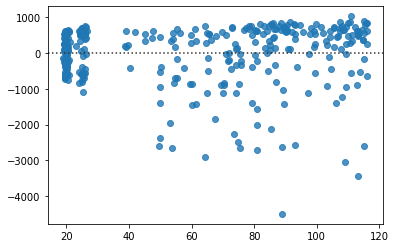

In [61]:
def plot_residuals(x, y):
    '''
    Plots the residuals of a model that uses x to predict y. Note that we don't
    need to make any predictions ourselves here, seaborn will create the model
    and predictions for us under the hood with the `residplot` function.
    '''
    return sns.residplot(x, y)

x=test[['monthly_charges']]
y=test[['total_charges']]
plot_residuals(x,y)

### Write a function, plot_regression(x, y) that takes a feature and a target and returns the datapoints, the regression line, and the confidence interval.